In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Data loading and pre-processing
train_X = pd.read_csv('train.csv')
test_X = pd.read_csv('test.csv' )
train_X.drop(train_X.columns[train_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_X.drop(test_X.columns[test_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

train_result = pd.read_csv('train_result.csv')
train_y_class = train_result['Class']

#converting into numpy arrays
X_train = train_X.to_numpy()
X_test = test_X.to_numpy()
train_y = train_y_class.to_numpy()

print(train_y.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(50000, 1568)
(10000, 1568)


In [3]:
#Train and Validation Splits
X_train, X_val, train_y, val_y = train_test_split(X_train, train_y,  test_size=0.20, random_state=101)

In [4]:
print(X_train.shape)
print(X_val.shape)
print(train_y.shape)
print(val_y.shape)

(40000, 1568)
(10000, 1568)
(40000,)
(10000,)


In [5]:
#One hot encoding 
from tensorflow.keras.utils import to_categorical
c = len(np.unique(train_y))
y_train = to_categorical(train_y,c)
y_val = to_categorical(val_y,c)

In [6]:
#y_train
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
#Resharing into (28,56,1) feature dimensions
# SHAPE --> (num_images,width,height,color_channels)
X_train = X_train.reshape(40000, 28, 56, 1)
X_val = X_val.reshape(10000, 28, 56, 1)
X_test = X_test.reshape(10000, 28, 56, 1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 28, 56, 1)
(10000, 28, 56, 1)
(10000, 28, 56, 1)


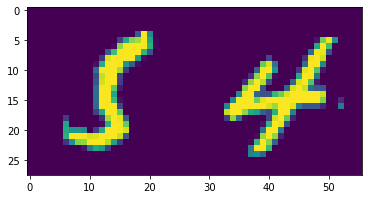

In [8]:
single_image = X_train[0]
plt.imshow(single_image)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization

In [10]:
#CNN Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28, 56, 1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(19, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 54, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 52, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 26, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 22, 128)        1

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40000, 28, 56, 1)
(10000, 28, 56, 1)
(40000, 19)
(10000, 19)


In [15]:
#epochs=100
#model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val, y_val),callbacks=[early_stop])

model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop] )

Epoch 1/100
313/313 [==============================] - 198s 628ms/step - loss: 0.8127 - accuracy: 0.7452 - val_loss: 6.8377 - val_accuracy: 0.0461
Epoch 2/100
313/313 [==============================] - 180s 575ms/step - loss: 0.0867 - accuracy: 0.9746 - val_loss: 0.1445 - val_accuracy: 0.9542
Epoch 3/100
313/313 [==============================] - 174s 557ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0811 - val_accuracy: 0.9772
Epoch 4/100
313/313 [==============================] - 173s 553ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 5/100
313/313 [==============================] - 176s 564ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0935 - val_accuracy: 0.9746
Epoch 6/100
313/313 [==============================] - 173s 553ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0948 - val_accuracy: 0.9738
Epoch 7/100
313/313 [==============================] - 177s 566ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
losses = pd.DataFrame(model.history.history)

In [18]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.812678,0.745225,6.837706,0.0461
1,0.086687,0.974550,0.144460,0.9542
2,0.037655,0.988575,0.081142,0.9772
3,0.024322,0.992675,0.070669,0.9778
4,0.021329,0.993275,0.093473,0.9746


<AxesSubplot:>

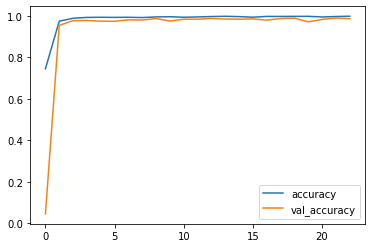

In [19]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

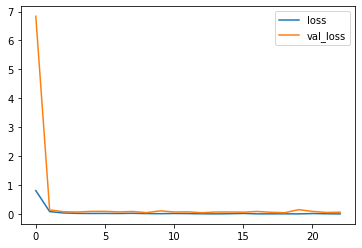

In [20]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

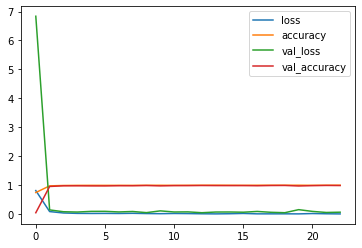

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [22]:
print(model.metrics_names)
print(model.evaluate(X_val,y_val,verbose=0))

['loss', 'accuracy']
[0.06517006456851959, 0.986299991607666]


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
#Predictions on validation set
predictions = np.argmax(model.predict(X_val),axis=1)
predictions

313/313 [==============================] - 9s 28ms/step


array([ 6,  1, 15, ...,  1,  2,  3], dtype=int64)

In [25]:
print(classification_report(val_y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      1.00       202
           2       1.00      0.99      0.99       343
           3       1.00      0.98      0.99       439
           4       0.99      0.99      0.99       537
           5       0.98      0.99      0.99       597
           6       0.98      0.99      0.99       692
           7       1.00      0.99      0.99       817
           8       0.97      0.99      0.98       917
           9       1.00      0.98      0.99       987
          10       0.99      0.98      0.99       938
          11       0.98      0.99      0.99       762
          12       0.99      0.98      0.99       706
          13       0.98      0.99      0.99       578
          14       0.97      0.99      0.98       459
          15       0.98      0.99      0.98       367
          16       0.97      0.98      0.97       292
          17       0.98    

In [26]:
confusion_matrix = confusion_matrix(val_y,predictions)
confusion_matrix

array([[101,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   1, 338,   0,   0,   0,   0,   2,   2,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 430,   0,   5,   0,   0,   3,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1, 534,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 592,   2,   0,   0,   0,   1,   1,   0,
          1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 687,   0,   2,   0,   0,   1,   0,
          0,   1,   0,   0,   0,   0],
       [  0,   1,   1,   0,   1,   0,   1, 808,   3,   0,   1,   0,   1,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0, 906,   0,   2,   0,   0,
          4,   2,   0,   1,   0

In [27]:
#Prediction Statistics on Validaton Set

sum_preds = np.sum(confusion_matrix)
sum_correct = np.sum(np.diag(confusion_matrix))
misclassification_error = 1.0 - (float(sum_correct) / float(sum_preds))
    
print("sum_preds               :", int(sum_preds)) 
print("sum_correct_predictions :", int(sum_correct)) 
print("sum_wrong_predictions   :", int(sum_preds - sum_correct))
print("misclassification_error :", misclassification_error)

sum_preds               : 10000
sum_correct_predictions : 9863
sum_wrong_predictions   : 137
misclassification_error : 0.013700000000000045


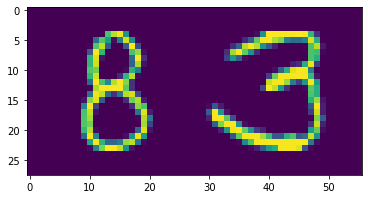

In [28]:
my_number = X_val[999]
plt.imshow(my_number)

In [29]:
# SHAPE --> (num_images,width,height,color_channels)
#model.predict_classes(my_number.reshape(1,28,56,1))

predict_x=model.predict(my_number.reshape(1,28,56,1)) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

1/1 [==============================] - 0s 31ms/step
[11]


In [30]:
#Test predictions using the model
print('\n')
print("Test Predictions")
test_predictions =  np.argmax(model.predict(X_test),axis=1)
print(test_predictions)
print(len(test_predictions))
print(type(test_predictions))
df = pd.DataFrame(test_predictions)
df.index.name= 'Index'
df.columns = ['Class']
file_name = f'test_predictions_cnn_model6.csv'
df.to_csv(file_name, index=True)
df



Test Predictions
313/313 [==============================] - 9s 28ms/step
[14  7 10 ... 10  4  6]
10000
<class 'numpy.ndarray'>


,Class
Index,
0,14
1,7
2,10
3,7
4,5
...,...
9995,7
9996,12
9997,10


# ReTrain with Full DataSet

In [31]:
train_X = pd.read_csv('train.csv')
test_X = pd.read_csv('test.csv' )
train_X.drop(train_X.columns[train_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_X.drop(test_X.columns[test_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

train_result = pd.read_csv('train_result.csv')
train_y_class = train_result['Class']

X_train = train_X.to_numpy()
X_test = test_X.to_numpy()
train_y = train_y_class.to_numpy()

print(train_y.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(50000, 1568)
(10000, 1568)


In [32]:
from tensorflow.keras.utils import to_categorical
c = len(np.unique(train_y))
y_train = to_categorical(train_y,c)

In [34]:
X_train = X_train.reshape(50000, 28, 56, 1)
X_test = X_test.reshape(10000, 28, 56, 1)
print(X_train.shape)
print(X_test.shape)

(50000, 28, 56, 1)
(10000, 28, 56, 1)


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 54, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 52, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 26, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 22, 128)        1

In [37]:
model.fit(X_train, y_train, batch_size=128, epochs=100 )

Epoch 1/100
391/391 [==============================] - 222s 568ms/step - loss: 0.0254 - accuracy: 0.9936
Epoch 2/100
391/391 [==============================] - 231s 590ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 3/100
391/391 [==============================] - 222s 567ms/step - loss: 0.0108 - accuracy: 0.9968
Epoch 4/100
391/391 [==============================] - 219s 561ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 5/100
391/391 [==============================] - 211s 539ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 6/100
391/391 [==============================] - 210s 538ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 7/100
391/391 [==============================] - 212s 541ms/step - loss: 0.0088 - accuracy: 0.9978
Epoch 8/100
391/391 [==============================] - 223s 572ms/step - loss: 0.0081 - accuracy: 0.9978
Epoch 9/100
391/391 [==============================] - 216s 551ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 10/100
391/391 [==============================] -

<AxesSubplot:>

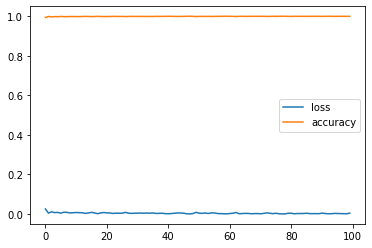

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
print('\n')
print("Test Predictions")
test_predictions =  np.argmax(model.predict(X_test),axis=1)
print(test_predictions)
print(len(test_predictions))
print(type(test_predictions))
df = pd.DataFrame(test_predictions)
df.index.name= 'Index'
df.columns = ['Class']
file_name = f'test_predictions_cnn_model7_fullDataset.csv'
df.to_csv(file_name, index=True)
df



Test Predictions
313/313 [==============================] - 9s 29ms/step
[14  7 10 ... 10  4  6]
10000
<class 'numpy.ndarray'>


,Class
Index,
0,14
1,7
2,10
3,7
4,5
...,...
9995,7
9996,12
9997,10
